# Projeto de Análise, Limpeza e Predição de Dados

Autor: Bruna Namie Yamasaki

O dataset utilizado possui informações a respeito de profissionais da área de tecnologia e o objetivo é criar um modelo para predizer se um determinado indivíduo deseja ou não mudar de emprego.

Descrição do dataset: 

1. enrollee_id: ID exclusivo para o candidato
2. city: Código da cidade
3. city_ development _index: Índice de desenvolvimento da cidade (em escala)
4. gender: Gênero do candidato
5. relevent_experience: Experiência relevante do candidato
6. enrolled_university: Tipo de curso universitário matriculado, se houver
7. education_level: Nível de educação do candidato
8. major_discipline: Major principal de educação do candidato
9. experience: Experiência total do candidato em anos
10. company_size: Nº de funcionários na empresa do empregador atual
11. company_type: Tipo de empregador atual
12. lastnewjob: Diferença em anos entre o emprego anterior e o emprego atual
13. training_hours: Horas de treinamento concluidas
15. target: 0 - Não está procurando uma mudança de emprego ou 1 - Procurando uma mudança de emprego (essa coluna está presente apenas no dataset de treino) 

## Setup

Para começar, alguns pacotes serão importados para a limpeza e análise dos dados


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Como temos dois datasets, um para treino e outro para teste, ambos deverão ser analisados, pois eles poderão exigir uma limpeza. Primeiramente, será analisado o dataset para treino.

In [2]:
train = pd.read_csv("train.csv")

Com o dataset já lido, pode-se verificar sua estrutura: 

In [3]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Com isso, percebe-se que há dados faltantes em algumas colunas e que, por sua vez, deverão ser tratados (considerando que no total deveriam se ter 19158 itens em cada coluna).

In [5]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Com o comando describe(), consegue-se obter mais infomações, nesse caso, sobre os dados numéricos. É possível perceber também que na coluna target temos como valor mínimo o 0 e máximo, o 1, assim como descrito anteriormente, além disso, como a média é aproximadamente 0.25, é esperado que a maioria não esteja procurando uma mudança de emprego.

Feito esses comandos, sabe-se que será necessário uma limpeza.

## Limpeza

Para começar, vamos observar os dados categóricos:

In [6]:
train["city"].unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [7]:
train["city"].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

Com o comando anterior, aparentemente essa coluna não precisa de nenhuma limpeza.

In [8]:
train["gender"].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [9]:
train["gender"].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Nesse caso, é provável que seja necessário tratar os dados classificados como "Other", porém, como existem dados nan, iremos fazer uma análise mais profunda posteriormente.

In [10]:
train["relevent_experience"].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

A coluna "relevent_experience" não possui nenhum erro!

In [11]:
train["enrolled_university"].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

Para a coluna "enrolled_university", teremos que apenas tratar os dados faltantes (será feito posteriormente).

In [12]:
train["education_level"].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

Assim como a coluna anterior, esta precisará tratar somente os dados faltantes.

In [13]:
train["major_discipline"].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

Essa coluna precisará da mesma limpeza que as outras acima.

In [14]:
train["experience"].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [15]:
train["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

Para essa coluna, poderia-se tentar fazer alguma limpeza para tratar os dados que são '> 20' e '< 1', porém, esses dados são importantes, então iremos deixá-los dessa forma.

In [16]:
train["company_size"].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [17]:
train["company_size"].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

Por intuição, parece que o dado do tipo '10/49' indica uma empresa que tenha entre 10 e 49 funcionários, assim, pode-se alterar apenas o formato, substituindo '/' por '-':

In [18]:
train["company_size"].replace("10/49", "10-49", inplace=True)

Conferindo a mudança:

In [19]:
train["company_size"].value_counts()

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [20]:
train["company_type"].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [21]:
train["last_new_job"].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

Para essas duas últimas colunas, deve-se tratar apenas os nan novamente, que será feito em seguida: 


In [22]:
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Ao observar o comando acima, pode-se excluir alguns dados que são nan e que correspondem a uma pequena parcela do dataset.

In [23]:
train.dropna(subset=['enrolled_university'], inplace=True)
train.dropna(subset=['education_level'], inplace=True)
train.dropna(subset=['experience'], inplace=True)
train.dropna(subset=['last_new_job'], inplace=True)

Verificando: 

In [24]:
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3863
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2222
experience                   0
company_size              5310
company_type              5476
last_new_job                 0
training_hours               0
target                       0
dtype: int64

Agora vamos observar a coluna "gender":

In [25]:
train["gender"].value_counts()

Male      12772
Female     1206
Other       173
Name: gender, dtype: int64

Como o número de dados faltantes é relativamente grande, vamos observar num gráfico se o gênero influencia na nossa target.

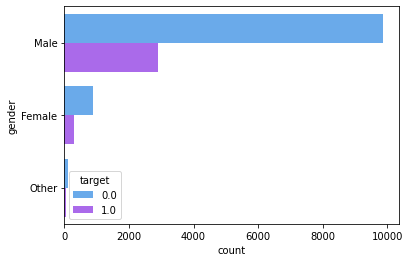

In [26]:
sns.countplot(y='gender', data = train, order = train.gender.value_counts().index, hue='target', palette='cool') 
plt.show()

Ao colocar os dados num gráfico, percebe-se que o gênero parece não influenciar se o indivíduo gostaria ou não mudar de emprego. Com isso, iremos criar uma nova classificação ("Others") para armazenar os dados faltantes e verificaremos se ela influencia.

In [27]:
train.fillna({"gender": "Others"}, inplace=True)

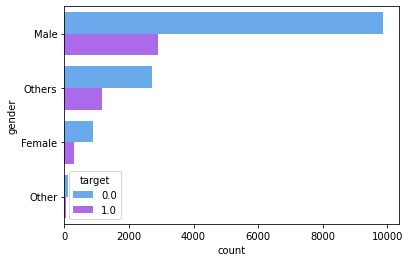

In [28]:
sns.countplot(y='gender', data = train, order = train.gender.value_counts().index, hue='target', palette='cool') 
plt.show()

Com isso, chegamos à conclusão de que, de fato, o gênero não irá influenciar se o indivíduo desejará mudar de emprego ou não e podemos juntar esses dados que eram nan com a classificação "Other".

In [29]:
train["gender"].replace("Others", "Other", inplace=True)

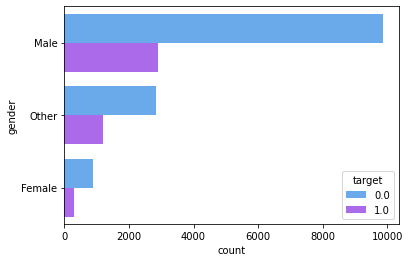

In [30]:
sns.countplot(y='gender', data = train, order = train.gender.value_counts().index, hue='target', palette='cool') 
plt.show()

Observando outra coluna, "major_discipline", percebe-se que os dados que são STEM são muitos. Assim, vamos colocar os dados nan na moda, uma vez que os outros dados são pequenos e "próximos" entre si.

In [31]:
train["major_discipline"].value_counts()

STEM               13993
Humanities           653
Other                364
Business Degree      322
Arts                 248
No Major             212
Name: major_discipline, dtype: int64

In [32]:
train.fillna({"major_discipline": "STEM"}, inplace=True)

In [33]:
train["major_discipline"].value_counts()

STEM               16215
Humanities           653
Other                364
Business Degree      322
Arts                 248
No Major             212
Name: major_discipline, dtype: int64

Relembrando quais são as colunas que possuem nan:

In [34]:
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              5310
company_type              5476
last_new_job                 0
training_hours               0
target                       0
dtype: int64

Observando a coluna "company_type":

In [35]:
train["company_type"].value_counts()

Pvt Ltd                9475
Funded Startup          975
Public Sector           912
Early Stage Startup     562
NGO                     500
Other                   114
Name: company_type, dtype: int64

Como o dado predominante é "Pvt Ltd", vamos substituir os nan para ela, de modo a não prejudicar muito o dataset.

In [36]:
train.fillna({"company_type": "Pvt Ltd"}, inplace=True)

In [37]:
train["company_type"].value_counts()

Pvt Ltd                14951
Funded Startup           975
Public Sector            912
Early Stage Startup      562
NGO                      500
Other                    114
Name: company_type, dtype: int64

Observando agora a coluna "company_size", percebe-se um problema: há 5310 dados que são nan e observando a resposta de value_counts() abaixo, percebe-se que em qualquer lugar que alocarmos, ele irá fazer uma grande diferença na nossa análise. Assim, será necessário observar se isso será relevante, de fato, para o nosso objetivo, assim como foi feito para a feature "gender".

In [38]:
train["company_size"].value_counts()

50-99        2950
100-500      2483
10000+       1964
10-49        1394
1000-4999    1282
<10          1242
500-999       847
5000-9999     542
Name: company_size, dtype: int64

Para analisar, vamos alocar os dados nan em uma nova classificação para essa variável categórica e iremos analisar a influência que essa feature tem sobre as outras, em especial, a nossa target.

In [39]:
train.fillna({"company_size": "Other"}, inplace=True)

In [40]:
train["company_size"].value_counts()

Other        5310
50-99        2950
100-500      2483
10000+       1964
10-49        1394
1000-4999    1282
<10          1242
500-999       847
5000-9999     542
Name: company_size, dtype: int64

Para analisar a correlação que essa feature possui com a target, obteve-se: 

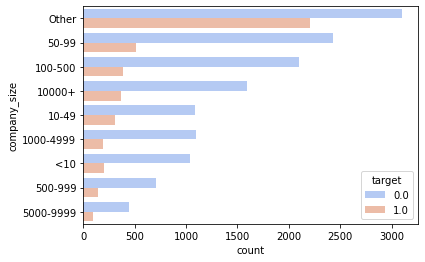

In [41]:
sns.countplot(y='company_size', data = train, order = train.company_size.value_counts().index, hue='target', palette='coolwarm') 
plt.show()

Com isso, podemos chegar a conclusão de que aparentemente o tamanho da empresa não influencia muito na target, uma vez que em todas as classificações (exceto a que adicionamos), grande parte das pessoas não desejam mudar de emprego. Entretanto, na coluna que foi adicionada, percebe-se que mais da metade dos dados indicam o contrário, assim, para não influenciar em nossa predição, iremos apenas excluí-las do nosso dataset.

In [42]:
train.drop(train[train["company_size"] == "Other"].index, inplace=True)

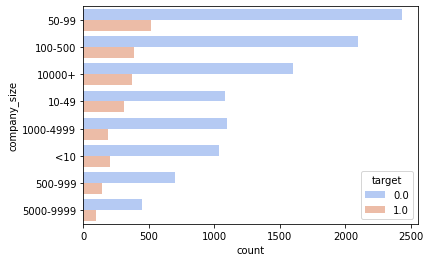

In [43]:
sns.countplot(y='company_size', data = train, order = train.company_size.value_counts().index, hue='target', palette='coolwarm') 
plt.show()

Analisando agora os dados numéricos.

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12704 entries, 1 to 19156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12704 non-null  int64  
 1   city                    12704 non-null  object 
 2   city_development_index  12704 non-null  float64
 3   gender                  12704 non-null  object 
 4   relevent_experience     12704 non-null  object 
 5   enrolled_university     12704 non-null  object 
 6   education_level         12704 non-null  object 
 7   major_discipline        12704 non-null  object 
 8   experience              12704 non-null  object 
 9   company_size            12704 non-null  object 
 10  company_type            12704 non-null  object 
 11  last_new_job            12704 non-null  object 
 12  training_hours          12704 non-null  int64  
 13  target                  12704 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Com o comando acima, consegue-se descobrir quais features são numéricas, além de que pode-se perceber também que todas elas possuem 12704 dados, dessa forma, não há dados faltantes.

Relembrando informações importantes sobre as features numéricas:

In [45]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,12704.000000,12704.00000,12704.000000,12704.000000
mean,16699.289830,0.83744,65.723945,0.174355
std,9707.189815,0.11956,60.672301,0.379429
min,2.000000,0.44800,1.000000,0.000000
25%,8253.750000,0.76200,23.000000,0.000000
50%,16616.500000,0.91000,47.000000,0.000000
75%,25204.500000,0.92000,89.000000,0.000000
max,33380.000000,0.94900,336.000000,1.000000


Com isso, pode-se afirmar que aparentemente não há dados discrepantes como também não há dados faltantes.

Para terminar a parte de limpeza do dataset, iremos também observar o dataset destinado ao nosso teste, onde iremos fazer a nossa predição.

In [46]:
test = pd.read_csv("test.csv")

In [47]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [49]:
test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


Com isso, chega-se à conclusão de que necessita-se tratar os dados faltantes e os dados numéricos parecem certos, mas ainda assim, precisa-se observar se os dados fazem sentido.

In [50]:
test["city"].unique()

array(['city_41', 'city_103', 'city_21', 'city_13', 'city_23', 'city_160',
       'city_173', 'city_90', 'city_46', 'city_98', 'city_118',
       'city_114', 'city_134', 'city_73', 'city_116', 'city_16',
       'city_165', 'city_61', 'city_136', 'city_45', 'city_104',
       'city_28', 'city_149', 'city_105', 'city_76', 'city_83', 'city_97',
       'city_64', 'city_31', 'city_19', 'city_11', 'city_143', 'city_100',
       'city_67', 'city_75', 'city_127', 'city_101', 'city_139',
       'city_27', 'city_71', 'city_99', 'city_70', 'city_69', 'city_44',
       'city_150', 'city_74', 'city_176', 'city_155', 'city_167',
       'city_30', 'city_89', 'city_57', 'city_162', 'city_36', 'city_107',
       'city_128', 'city_39', 'city_102', 'city_65', 'city_10', 'city_40',
       'city_152', 'city_123', 'city_179', 'city_50', 'city_115',
       'city_77', 'city_159', 'city_80', 'city_72', 'city_171',
       'city_158', 'city_138', 'city_142', 'city_25', 'city_14',
       'city_33', 'city_79', 'ci

In [51]:
test["city"].value_counts()

city_103    473
city_21     318
city_16     168
city_114    155
city_160    113
           ... 
city_139      1
city_141      1
city_82       1
city_12       1
city_93       1
Name: city, Length: 108, dtype: int64

Essa primeira, parece não precisar de nenhuma limpeza.

In [52]:
test["gender"].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [53]:
test["gender"].value_counts()

Male      1460
Female     137
Other       24
Name: gender, dtype: int64

Assim como o dataset de treino, a feature "gender" possui uma classificação "Other" e alguns dados faltantes.

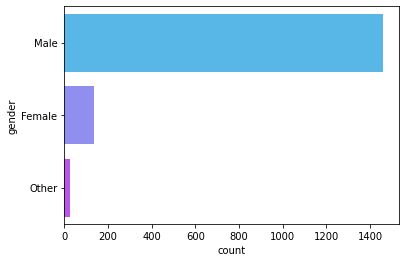

In [54]:
sns.countplot(y='gender', data = test, order = test.gender.value_counts().index, palette='cool') 
plt.show()

Observando a quantidade de dados faltantes:

In [55]:
test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

Com isso, iremos adicionar esses dados faltantes na classificação "Other"

In [56]:
test.fillna({"gender": "Other"}, inplace=True)

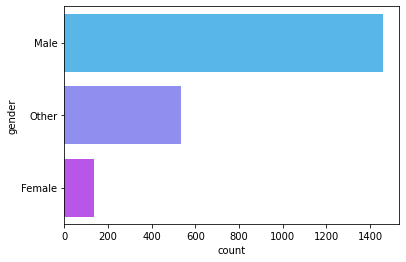

In [57]:
sns.countplot(y='gender', data = test, order = test.gender.value_counts().index, palette='cool') 
plt.show()

Analisando a feature "relevant_experience" percebe-se que ela não precisará de nenhuma manipulação.

In [58]:
test["relevent_experience"].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [59]:
test["enrolled_university"].unique()

array(['Full time course', 'no_enrollment', 'Part time course', nan],
      dtype=object)

In [60]:
test["education_level"].unique()

array(['Graduate', 'High School', 'Masters', nan, 'Phd', 'Primary School'],
      dtype=object)

In [61]:
test["major_discipline"].unique()

array(['STEM', nan, 'Other', 'Business Degree', 'Arts', 'Humanities',
       'No Major'], dtype=object)

In [62]:
test["experience"].unique()

array(['9', '5', '<1', '11', '>20', '10', '14', '3', '20', '8', '4', '13',
       '2', '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

In [63]:
test["experience"].value_counts()

>20    383
5      163
3      154
4      145
6      130
2      128
7      116
9      113
10      96
11      86
8       82
<1      74
16      68
15      59
1       56
14      55
13      54
12      52
17      36
19      29
18      26
20      19
Name: experience, dtype: int64

In [64]:
test["company_size"].unique()

array(['<10', nan, '10/49', '10000+', '100-500', '50-99', '1000-4999',
       '500-999', '5000-9999'], dtype=object)

In [65]:
test["company_size"].value_counts()

50-99        338
100-500      318
10000+       217
10/49        172
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

Fazendo a mesma mudança feita no dataset de treino:

In [66]:
test["company_size"].replace("10/49", "10-49", inplace=True)

In [67]:
test["company_size"].value_counts()

50-99        338
100-500      318
10000+       217
10-49        172
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

In [68]:
test["company_type"].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Other', 'Public Sector',
       'Early Stage Startup', 'NGO'], dtype=object)

In [69]:
test["last_new_job"].unique()

array(['1', 'never', '>4', '2', '4', '3', nan], dtype=object)

Foram analisadas várias features acima e percebeu-se que a única mudança esperada nelas é o tratamento dos dados faltantes:

In [70]:
test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

Fazendo os mesmos tratamentos feitos no dataset de treino:

In [71]:
test.dropna(subset=['enrolled_university'], inplace=True)
test.dropna(subset=['education_level'], inplace=True)
test.dropna(subset=['experience'], inplace=True)
test.dropna(subset=['last_new_job'], inplace=True)
test.dropna(subset=['company_size'], inplace=True)

Verificando:

In [72]:
test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline          115
experience                  0
company_size                0
company_type               68
last_new_job                0
training_hours              0
dtype: int64

In [73]:
test["major_discipline"].value_counts()

STEM               1180
Humanities           58
Business Degree      31
Other                26
No Major             16
Arts                 15
Name: major_discipline, dtype: int64

In [74]:
test.fillna({"major_discipline": "STEM"}, inplace=True)

In [75]:
test["major_discipline"].value_counts()

STEM               1295
Humanities           58
Business Degree      31
Other                26
No Major             16
Arts                 15
Name: major_discipline, dtype: int64

In [76]:
test["company_type"].value_counts()

Pvt Ltd                1049
Public Sector           106
Funded Startup           94
Early Stage Startup      62
NGO                      51
Other                    11
Name: company_type, dtype: int64

In [77]:
test.fillna({"company_type": "Pvt Ltd"}, inplace=True)

In [78]:
test["company_type"].value_counts()

Pvt Ltd                1117
Public Sector           106
Funded Startup           94
Early Stage Startup      62
NGO                      51
Other                    11
Name: company_type, dtype: int64

Com isso, concluí-se a parte de Limpeza.

## Insights

Com a limpeza feita, finalmente pode-se começar a fazer insights, o que será muito importante para determinar quais são os principais fatores a serem considerados para criar um modelo de predição. 

Observação: para a criação de insights será utilizado a base de treino!

Para analisar de maneira geral, pode-se utilizar o heatmap, pois ele é bem útil para observar as correlações:

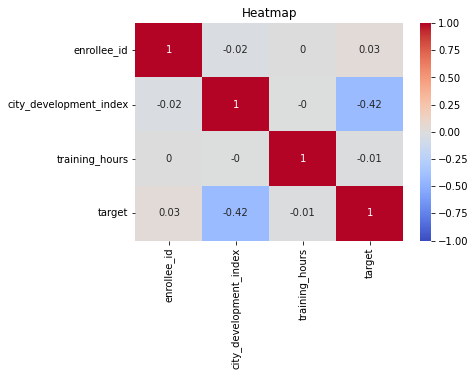

In [79]:
corr = train.corr()
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=np.round(corr.values, 2),
cmap='coolwarm') 
plt.title("Heatmap")
plt.show()

Com esse heatmap, percebeu-se que parece que há uma relação entre a target e o índice de desenvolvimento da cidade! Para verificar, foram feitos mais alguns gráficos:

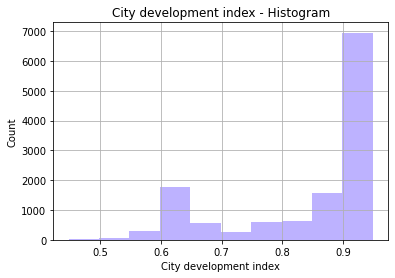

In [80]:
train['city_development_index'].hist( color='#bdb2ff')
plt.title("City development index - Histogram")
plt.xlabel("City development index")
plt.ylabel("Count")
plt.show()

Com o histograma, consegue-se perceber que há mais dados sobre cidades com índice alto e um certo pico de dados em cidades com índice perto de 0.6.

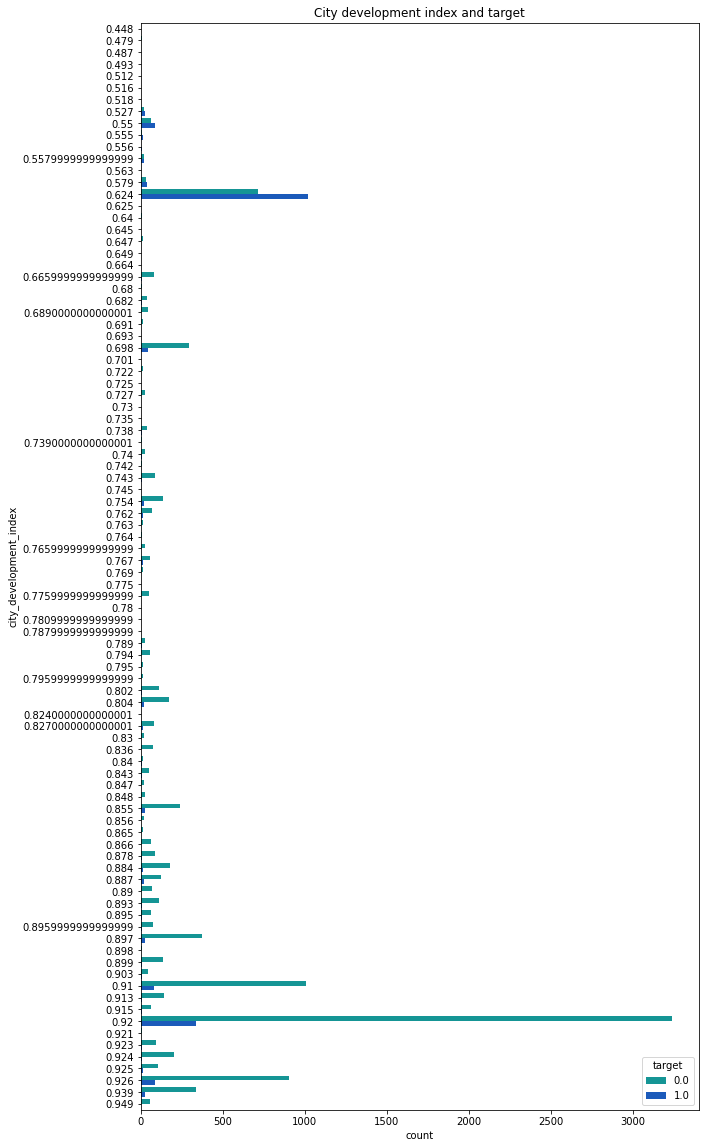

In [81]:
plt.figure(figsize=(10,20))
plt.title("City development index and target")
sns.countplot(y='city_development_index', hue = 'target' , data = train, palette='winter_r') 
plt.show()

Devido a variedade de números desde 0 até 1, foi feito um gráfico de tamanho grande para uma boa visualização. Percebeu-se que o eixo y varia em ordem decrescente e a partir das cores das colunas, pode-se chegar à conclusão que em índices altos poucas pessoas querem trocar de emprego, enquanto que em outros mais baixos, a maioria quer mudar, como pode ser visto no índice 0.624.

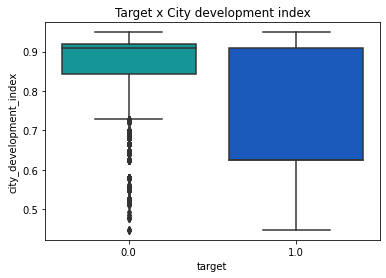

In [82]:
sns.boxplot(x='target', y = 'city_development_index', data=train, palette = "winter_r")
plt.title("Target x City development index")
plt.show()

Fazendo um boxplot também é possível observar a afirmação feita anteriormente, tanto que pessoas que gostariam de mudar de emprego e estão em cidades com índice baixo, pelo gráfico, são consideradas outliers.

Outra maneira que também podemos analisar é agrupar os dados mais relevantes, ou seja, os índices que mais aparecem e suas quantidades de target. 

In [83]:
df_city_development_index= train.groupby(['city_development_index', 'target']).count().sort_values("enrollee_id", ascending = False)

In [84]:
df_city_development_index

enrollee_id  city  ...  last_new_job  training_hours
city_development_index target                     ...                              
0.920                  0.0            3240  3240  ...          3240            3240
0.624                  1.0            1022  1022  ...          1022            1022
0.910                  0.0            1008  1008  ...          1008            1008
0.926                  0.0             906   906  ...           906             906
0.624                  0.0             717   717  ...           717             717
...                                    ...   ...  ...           ...             ...
0.649                  0.0               1     1  ...             1               1
                       1.0               1     1  ...             1               1
0.664                  1.0               1     1  ...             1               1
0.735                  1.0               1     1  ...             1               1
0.701                  0.0               1     1  ...             1               1

[166 rows x 12 columns]

A partir dessa visualização, já se pode confirmar novamente o que foi analisado anteriormente.

In [85]:
df_city_development_index.reset_index(level=["city_development_index"], inplace=True)

In [86]:
df_city_development_index.reset_index(level=["target"], inplace=True)

In [87]:
df_city_development_index = df_city_development_index.rename(columns={'city': 'Count'})

Para conseguir fazer um gráfico de barras, foram feitos os códigos acima a fim de conseguir pegar as colunas desejadas.

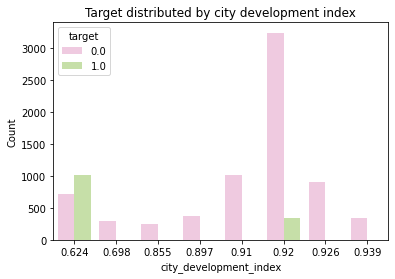

In [88]:
sns.barplot(x='city_development_index', y='Count', data=df_city_development_index.iloc[0:10], hue = 'target', palette='PiYG')
plt.title("Target distributed by city development index")
plt.show()

E novamente, podemos confirmar a conclusão feita e ter um gráfico de barras com uma melhor visualização (menos poluída).

Agora, deve-se fazer também uma análise sobre os dados categóricos e verificar quais deles influenciam na nossa target.

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12704 entries, 1 to 19156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12704 non-null  int64  
 1   city                    12704 non-null  object 
 2   city_development_index  12704 non-null  float64
 3   gender                  12704 non-null  object 
 4   relevent_experience     12704 non-null  object 
 5   enrolled_university     12704 non-null  object 
 6   education_level         12704 non-null  object 
 7   major_discipline        12704 non-null  object 
 8   experience              12704 non-null  object 
 9   company_size            12704 non-null  object 
 10  company_type            12704 non-null  object 
 11  last_new_job            12704 non-null  object 
 12  training_hours          12704 non-null  int64  
 13  target                  12704 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Relembrando de algumas análise feitas anteriormente, sabe-se que as features 'gender' e 'company_size' não irão afetar a nossa predição de maneira direta, uma vez que, por exemplo, de maneira geral, não importa qual o gênero do indivíduo, há uma grande probabilidade de ele não querer mudar de emprego, assim como também não importa qual o tamanho da empresa.

Dessa forma, deve-se analisar as outras features categóricas e observar se alguma delas irá influenciar na nossa target.

A primeira feature a ser analisada foi a "city":

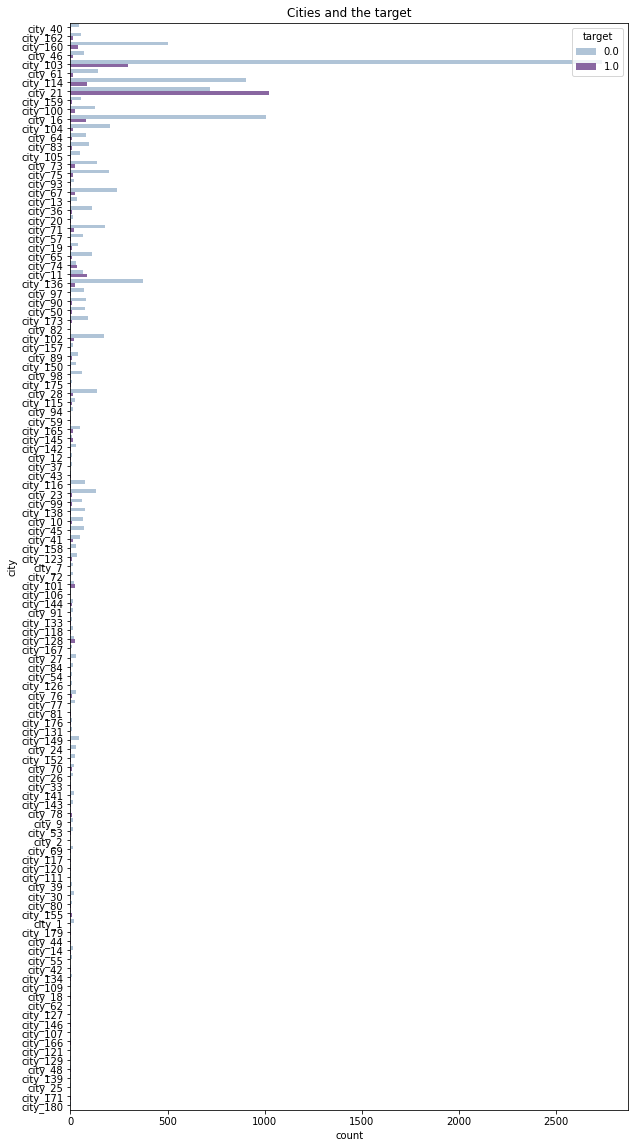

In [90]:
plt.figure(figsize=(10,20))
sns.countplot(y='city', hue = 'target', data=train, palette = "BuPu")
plt.title("Cities and the target")
plt.show()

Por conta da grande variedade de cidades, foi feito um gráfico grande para uma melhor visualização. Com isso, pôde ser observado que há uma cidade em que muitas pessoas não querem mudar de emprego e em outra que querem, ou seja, a cidade influencia na nossa target.

Para conseguirmos ver as cidades com os maiores dados e informações sobre a target, foi feita as manipulações abaixo e criado um gráfico de barras, análogo ao visto acima.

In [91]:
df_city= train.groupby(['city', 'target']).count().sort_values("enrollee_id", ascending = False)
df_city.reset_index(level=["city"], inplace=True)
df_city.reset_index(level=["target"], inplace=True)
df_city = df_city.rename(columns={'enrollee_id': 'Count'})

In [92]:
df_city

,target,city,Count,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.0,city_103,2737,2737,2737,2737,2737,2737,2737,2737,2737,2737,2737,2737
1,1.0,city_21,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022
2,0.0,city_16,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008
3,0.0,city_114,906,906,906,906,906,906,906,906,906,906,906,906
4,0.0,city_21,717,717,717,717,717,717,717,717,717,717,717,717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.0,city_180,1,1,1,1,1,1,1,1,1,1,1,1
210,1.0,city_12,1,1,1,1,1,1,1,1,1,1,1,1
211,1.0,city_133,1,1,1,1,1,1,1,1,1,1,1,1
212,1.0,city_175,1,1,1,1,1,1,1,1,1,1,1,1


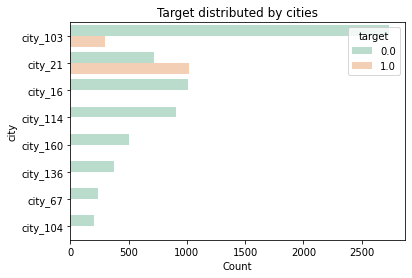

In [93]:
sns.barplot(y='city', x='Count', data=df_city.iloc[0:10], hue = 'target', palette='Pastel2')
plt.title("Target distributed by cities")
plt.show()

Com esse "zoom", pode-se confirmar o que foi falado anteriormente: a cidade 21 é onde há uma maior quantidade de indivíduos que gostariam de trocar de emprego, enquanto na 103, há uma parcela que também gostaria, mas a grande maioria está satisfeita.

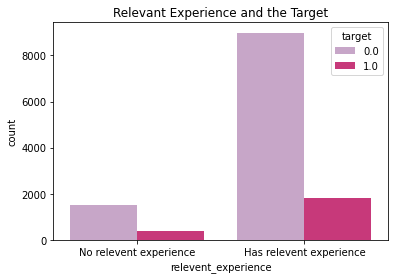

In [94]:
sns.countplot(x='relevent_experience', hue = 'target', data=train, palette = "PuRd")
plt.title("Relevant Experience and the Target")
plt.show()

Já para essa feature, observa-se que não há uma relação tão explicita entre a experiência relevante do candidato e a target.

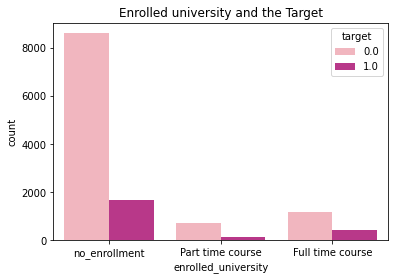

In [95]:
sns.countplot(x='enrolled_university', hue = 'target', data=train, palette = "RdPu")
plt.title("Enrolled university and the Target")
plt.show()

O mesmo pode-se observar sobre o tipo de curso universitário matriculado.

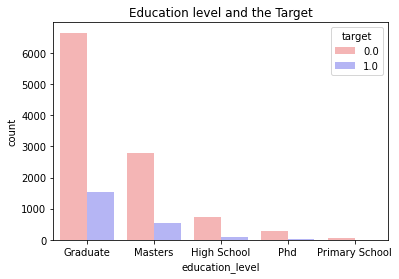

In [96]:
sns.countplot(x='education_level', hue = 'target', data=train, palette = "bwr_r")
plt.title("Education level and the Target")
plt.show()

Similarmente para o nível de educação do candidato.

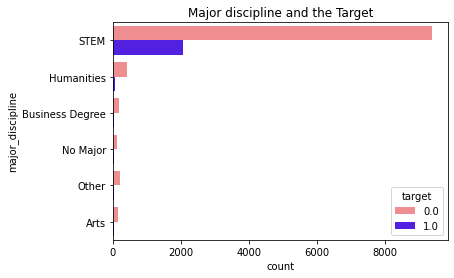

In [97]:
sns.countplot(y='major_discipline', hue = 'target', data=train, palette = "gnuplot2_r")
plt.title("Major discipline and the Target")
plt.show()

Para o major principal de educação do candidato, quase se pode afirmar o mesmo, porém pelo fato de termos um número finito de classificações para essa feature e que grande parte das pessoas que buscam uma mudança de emprego estarem concentradas na STEM, pode-se concluir que uma pessoa que procura tal mudança, tem grandes chances de possuir um major de educação: STEM.

In [98]:
df_experience = train.sort_values(by = 'experience', ascending = True)

In [99]:
df_experience

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2079,15604,city_101,0.558,Male,No relevent experience,no_enrollment,Graduate,STEM,1,100-500,Pvt Ltd,1,92,0.0
12881,30755,city_21,0.624,Other,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Pvt Ltd,1,20,0.0
12342,28691,city_165,0.903,Female,Has relevent experience,no_enrollment,Graduate,Humanities,1,100-500,Pvt Ltd,never,5,0.0
5687,1720,city_115,0.789,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,NGO,1,35,0.0
11849,6924,city_65,0.802,Male,No relevent experience,no_enrollment,Graduate,STEM,1,10-49,Other,1,51,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10031,9847,city_103,0.920,Other,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,>4,51,0.0
10030,16053,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,>4,49,0.0
16716,14272,city_103,0.920,Other,Has relevent experience,no_enrollment,Masters,Humanities,>20,100-500,Pvt Ltd,1,54,0.0
9986,10180,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,>4,29,0.0


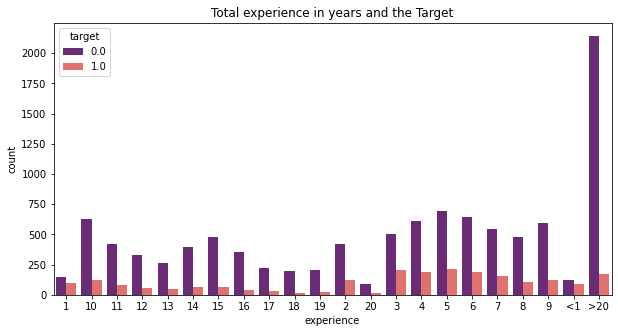

In [100]:
plt.figure(figsize=(10,5))
sns.countplot(x='experience', hue = 'target', data= df_experience, palette = "magma")
plt.title("Total experience in years and the Target")
plt.show()

Para a experiência total do candidato em anos, observa-se que ainda que em todas as classificações, a grande parte das pessoas não busca uma mudança de emprego e aquelas que buscam se concentram onde há poucos anos de experiência, como 3, 4, 5 até 10 anos. 

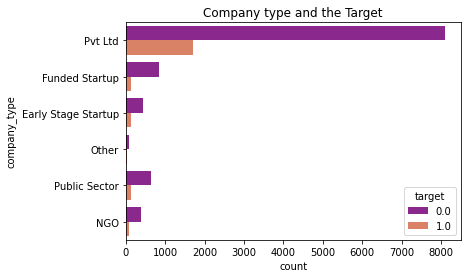

In [101]:
sns.countplot(y='company_type', hue = 'target', data=train, palette = "plasma")
plt.title("Company type and the Target")
plt.show()

Para o tipo de empresa, percebe-se que assim como a 'major_discipline', em todas as classificações existe um padrão de que a maioria não busca trocar de emprego, mas percebe-se que há uma maior concentração na empresa Pvt Ltd. Assim, uma pessoa que está buscando trocar de emprego provavelmente trabalha nessa empresa.

In [102]:
df_last_new_job = train.sort_values(by = 'last_new_job', ascending = True)

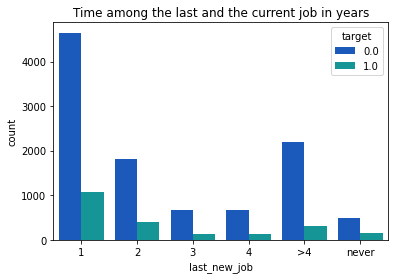

In [103]:
sns.countplot(x='last_new_job', hue = 'target', data=df_last_new_job, palette = "winter")
plt.title("Time among the last and the current job in years")
plt.show()

Para a feature relacionada com a diferença em anos entre o emprego anterior e o atual, pode-se perceber que a maioria das pessoas que busca uma mudança de emprego possui uma menor diferença em anos entre o emprego anterior e o atual. Porém, pode-se perceber também que esse número de pessoas aumenta conforme o número de dados que em cada classificação.

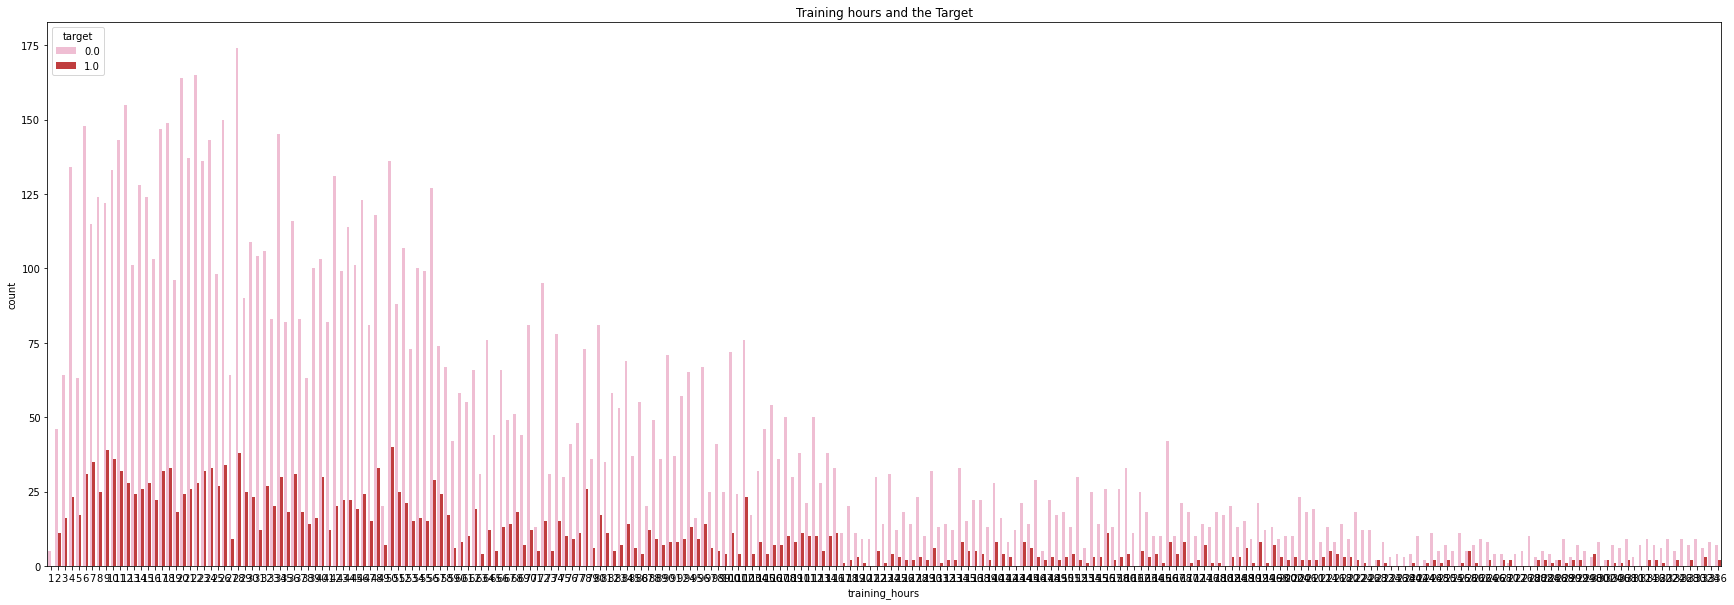

In [104]:
plt.figure(figsize=(30,10))
sns.countplot(x='training_hours', hue = 'target', data=train, palette = "tab20_r")
plt.title("Training hours and the Target")
plt.show()

Com o gráfico acima, ainda que com as numerações no eixo x bem confusas e agrupadas, percebe-se que os números estão em ordem crescente. Com isso, pode-se afirmar que há muito mais dados sobre indivíduos com poucas horas de treino e que a maioria das pessoas que busca uma mudança de emprego situa-se entre eles.

Após todas as análises feitas anteriormente, pôde-se concluir que mesmo naquelas em que não foi observada uma relação explícita, existe uma maior probabilidade de que se for analisado um indivíduo que busca trocar de emprego, ele irá provavelmente pertencer a uma certa classificação, pois em todas as features, há uma classificação que possui mais dados com target = 1. 
Além disso, deve-se levar em conta algumas features que influenciam na nossa target, como a cidade, o índice de desenvolvimento da cidade, major principal de educação do candidato, experiência total do candidato e horas de treinamento concluídas.

## Aprendizado supervisionado (modelos)

Como a nossa target é se a pessoa está ou não procurando uma mudança de emprego, tem-se um problema de classificação binária. Dessa forma, pode-se focar em alguns modelos de aprendizado para classificação! 

Para começar, será utilizado o modelo de regressão logística.

Importando as biblitecas necessárias: 

In [105]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

Sabe-se que há dois datasets, um para treino e outro para teste, mas para ver qual o melhor modelo para utilizar na predição do dataset de teste, será feito o uso das métricas.

Para relembrar o dataset de treino:

In [106]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0


Relembrando também que 0 indica que o indivíduo não busca mudança de emprego e que 1 busca.

In [107]:
train["target"].unique()

array([0., 1.])

In [108]:
train["target"].value_counts()

0.0    10489
1.0     2215
Name: target, dtype: int64

Como há features que são categóricas, para criar o modelo será necessário transformar essas variáveis em números por meio do Encoding: 

In [109]:
one_hot_encoding = pd.get_dummies(train)
one_hot_encoding

,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_141,city_city_142,...,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_10-49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
1,29725,0.776,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,666,0.767,8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6,28806,0.920,24,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,402,0.762,18,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
8,27107,0.920,46,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,251,0.920,36,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
19150,32313,0.920,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
19152,29754,0.920,25,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
19155,24576,0.920,44,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


Agora, o dataset de treino será separado em duas partes, uma para o treino de fato e outro para fazermos o teste e avaliarmos o modelo. Isso será feito para todos os modelos e sempre será separado 20% dos dados para esse teste.

In [110]:
X = one_hot_encoding.drop('target', axis = 1)
y = one_hot_encoding['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y,test_size=0.2)

Criando o modelo de regressão logística: 

In [111]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Inicialmente, para observar os resultados, irá fazer uso somente da acurácia, mas depois será feita uma comparação mais aprofundada entre os modelos utilizando diversas métricas.

In [112]:
y_predicted_logreg = logreg.predict(X_test)

print(f'Acurácia: {accuracy_score(y_test, y_predicted_logreg)}')

Acurácia: 0.8441558441558441


Criando outro modelo: Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier(
    max_depth=25,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf.fit(X_train.values, y_train.values)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=42)

In [115]:
y_predicted_rf = rf.predict(X_test.values)
print(f'Acurácia: {accuracy_score(y_test.values, y_predicted_rf)}')

Acurácia: 0.850452577725305


Criando mais um modelo: K Nearest Neighbors (kNN)

Antes de criar o modelo, é interessente achar um valor de K ideal:

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [117]:
best_classifier = None
best_score = 0.0
best_k = 0
k_range = range(5, 30, 5)

for k in k_range:
    knn = KNeighborsClassifier(k)
    score = np.mean(cross_val_score(knn, X_train, y_train, cv = 10))
    
    print(f"Finished for K = {k} | Score: {score:.4f}")
    if score > best_score:
        best_k = k
        best_score = score
        best_classifier = knn

print("========================================")
print(f"Best acc: {best_score:.4f} | K = {best_k}")

Finished for K = 5 | Score: 0.7939
Finished for K = 10 | Score: 0.8204
Finished for K = 15 | Score: 0.8205
Finished for K = 20 | Score: 0.8250
Finished for K = 25 | Score: 0.8245
Best acc: 0.8250 | K = 20


Com isso, será usado um K = 10 como uma tentativa de evitar o underfitting ainda que ele não seja o valor que possui o maior score

In [118]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [119]:
y_predicted_knn = knn_model.predict(X_test)
print(f'Acurácia: {accuracy_score(y_test, y_predicted_knn)}')

Acurácia: 0.820543093270366


Mais um modelo: Support Vector Machine (SVM)

In [120]:
from sklearn import svm

In [121]:
svm_model = svm.SVC(C = 1.0, probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [122]:
y_predicted_svm = svm_model.predict(X_test)
print(f'Acurácia: {accuracy_score(y_test, y_predicted_svm)}')

Acurácia: 0.8256591892955529


Para o último modelo que será implementado para comparação: Naive Bayes

In [123]:
from sklearn.naive_bayes import GaussianNB

In [124]:
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)

GaussianNB()

In [125]:
y_predicted_bayes = bayes_model.predict(X_test)
print(f'Acurácia: {accuracy_score(y_test, y_predicted_bayes)}')

Acurácia: 0.8091302636757183


Com isso, foram criados cinco modelos e agora é necessário escolher um deles para a predição do dataset de teste.

## Métricas

Relembrando as acurácias anteriores, percebeu-se que em todos modelos foi obtido um valor entre 80 e 86%.

Entretanto, deve-se levar em conta as outras métricas! 

Começando com a matriz de confusão: 

In [126]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


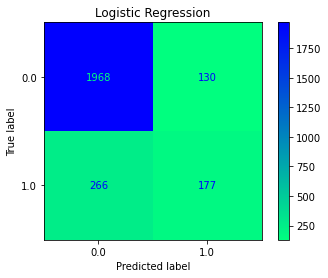

In [127]:
plot_confusion_matrix(logreg, X_test, y_test, values_format='d', cmap = "winter_r")
plt.title('Logistic Regression')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


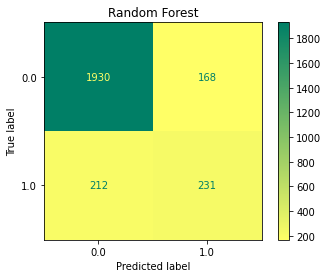

In [128]:
plot_confusion_matrix(rf, X_test.values, y_test.values, values_format='d', cmap = "summer_r")
plt.title('Random Forest')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


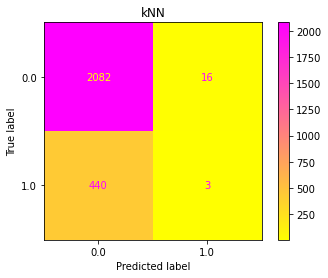

In [129]:
plot_confusion_matrix(knn_model, X_test, y_test, values_format='d', cmap = "spring_r")
plt.title('kNN')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


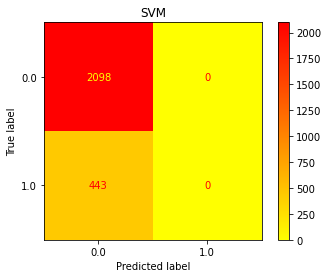

In [130]:
plot_confusion_matrix(svm_model, X_test, y_test, values_format='d', cmap = "autumn_r")
plt.title('SVM')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


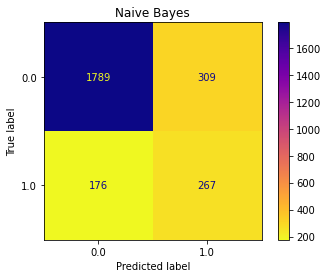

In [131]:
plot_confusion_matrix(bayes_model, X_test, y_test, values_format='d', cmap = "plasma_r")
plt.title('Naive Bayes')
plt.show()

Somente com essas matrizes, levando em conta o nosso objetivo de predição, ainda que todas possuam uma acurácia alta, percebe-se que há um modelo que nunca vai predizer que uma pessoa está buscando mudança de emprego, uma vez que há 0 pessoas no "quadrado" no canto inferior direito. Esse modelo, portanto, não deve ser utilizado.

Uma observação é que com o comando abaixo conseguimos saber qual valor deveria estar naquele "quadrado": 

In [132]:
y_test.value_counts()

0.0    2098
1.0     443
Name: target, dtype: int64

Além disso, percebe-se também que nesse modelo todos os dados que deveriam ser 1, foram colocados como 0.

A partir da matriz de confusão, também pode-se obter outras métricas (além da acurácia), como recall e precisão.

In [133]:
from sklearn.metrics import classification_report

In [134]:
print('Logistic Regression')
print(classification_report(y_test, y_predicted_logreg, zero_division=0))
print('Random Forest')
print(classification_report(y_test, y_predicted_rf, zero_division=0))
print('kNN')
print(classification_report(y_test, y_predicted_knn, zero_division=0))
print('SVM')
print(classification_report(y_test, y_predicted_svm, zero_division=0))
print('Naive Bayes')
print(classification_report(y_test, y_predicted_bayes, zero_division=0))

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      2098
         1.0       0.58      0.40      0.47       443

    accuracy                           0.84      2541
   macro avg       0.73      0.67      0.69      2541
weighted avg       0.83      0.84      0.83      2541

Random Forest
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      2098
         1.0       0.58      0.52      0.55       443

    accuracy                           0.85      2541
   macro avg       0.74      0.72      0.73      2541
weighted avg       0.84      0.85      0.85      2541

kNN
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      2098
         1.0       0.16      0.01      0.01       443

    accuracy                           0.82      2541
   macro avg       0.49      0.50      0.46      2541
weighted avg       0.71      0.82   

Outra métrica que pode ser útil, é a curva ROC:

In [135]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [136]:
y_test_int = (y_test.to_numpy() == 0.0).astype(int)

In [137]:
y_test_int

array([1, 1, 1, ..., 1, 1, 1])

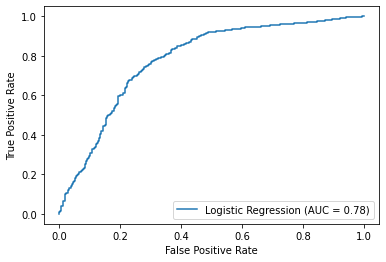

In [138]:
fpr, tpr, thresholds = roc_curve(y_test_int, logreg.predict_proba(X_test)[:,0])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

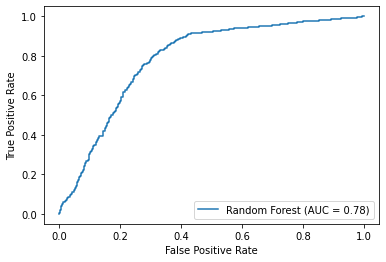

In [139]:
fpr, tpr, thresholds = roc_curve(y_test_int, rf.predict_proba(X_test.values)[:,0])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()
plt.show()

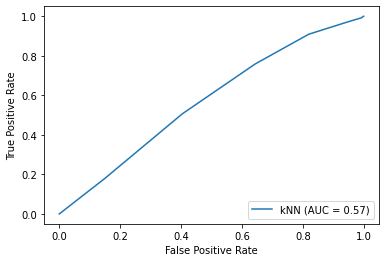

In [140]:
fpr, tpr, thresholds = roc_curve(y_test_int, knn_model.predict_proba(X_test)[:,0])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='kNN')
display.plot()
plt.show()

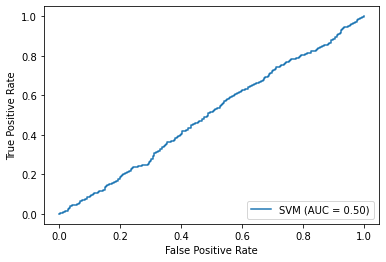

In [141]:
fpr, tpr, thresholds = roc_curve(y_test_int, svm_model.predict_proba(X_test)[:,0])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM')
display.plot()
plt.show()

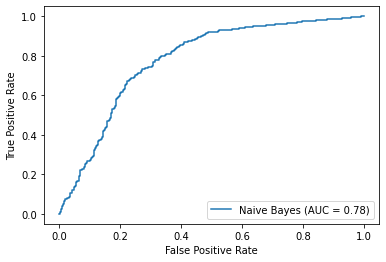

In [142]:
fpr, tpr, thresholds = roc_curve(y_test_int, bayes_model.predict_proba(X_test)[:,0])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Naive Bayes')
display.plot()
plt.show()

Obtendo agora os valores de AUC mais precisos dos modelos que possuiram um alto valor:

In [143]:
print(f'Logistic Regression: {roc_auc_score(y_test_int, logreg.predict_proba(X_test)[:,0])}')

Logistic Regression: 0.7802809081851576


In [144]:
print(f'Random Forest: {roc_auc_score(y_test_int, rf.predict_proba(X_test.values)[:,0])}')

Random Forest: 0.7831192557891317


In [145]:
print(f'Naive Bayes: {roc_auc_score(y_test_int, bayes_model.predict_proba(X_test)[:,0])}')

Naive Bayes: 0.7776878764468794


Com isso, foi escolhido o modelo Random Forest! 

## Predição final 

Relembrando do dataset para a predição: 

In [146]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Pvt Ltd,1,21
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10-49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
6,21465,city_21,0.624,Other,Has relevent experience,no_enrollment,Graduate,STEM,<1,100-500,Pvt Ltd,1,11
9,16287,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,3,50-99,Funded Startup,1,4


Antes de começar a utilizar o modelo, é necessário fazer um encoding do dataset de teste. Entretanto, para os dois datasets (treino e teste) possuírem o mesmo número de colunas e para ser possível utilizar o modelo, eles serão unidos e logo após será feito o encoding.

In [147]:
data =pd.concat([train, test])

In [148]:
one_hot_encoding_2 = pd.get_dummies(data)
one_hot_encoding_2

,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_141,city_city_142,...,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_10-49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
1,29725,0.776,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,666,0.767,8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6,28806,0.920,24,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,402,0.762,18,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
8,27107,0.920,46,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,31643,0.939,58,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2117,21500,0.725,160,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2121,27163,0.878,58,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2127,7873,0.804,84,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


Agora, será feito a divisão do dataframe resultante em treino e teste, onde cada parte será o respectivo dataset.

Observação: o valor 12704 é o número de samples que possuímos no dataset de treino.

In [149]:
X_final = one_hot_encoding_2.drop('target', axis = 1)
y_final = one_hot_encoding_2['target']
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_final, y_final, train_size=12704, shuffle = False)

Com isso, finalmente pode-se utilizar o modelo escolhido: Random Forest

In [150]:
rf_final = RandomForestClassifier(
    max_depth=25,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf_final.fit(X_train_f.values, y_train_f.values)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=42)

In [151]:
y_predicted_final = rf_final.predict(X_test_f.values)

In [152]:
y_predicted_final

array([0., 0., 0., ..., 0., 0., 0.])

Assim, tem-se os valores da predição, mas para analisar um pouco e ver se o resultado faz sentido, esse array será adicionado como uma nova coluna no dataset de teste.

In [153]:
test['target']=y_predicted_final

In [154]:
test['target'].value_counts()

0.0    1217
1.0     224
Name: target, dtype: int64

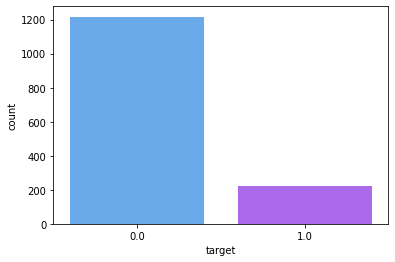

In [155]:
sns.countplot(x='target', data = test, palette='cool') 
plt.show()

Com isso, observa-se que não há somente valores de target = 0

Fazendo mais algumas análises (idênticas às feitas anteriormente) e comparando com o dataset de treino: 

Começando com a relação da target com o índice de desenvolvimento da cidade:

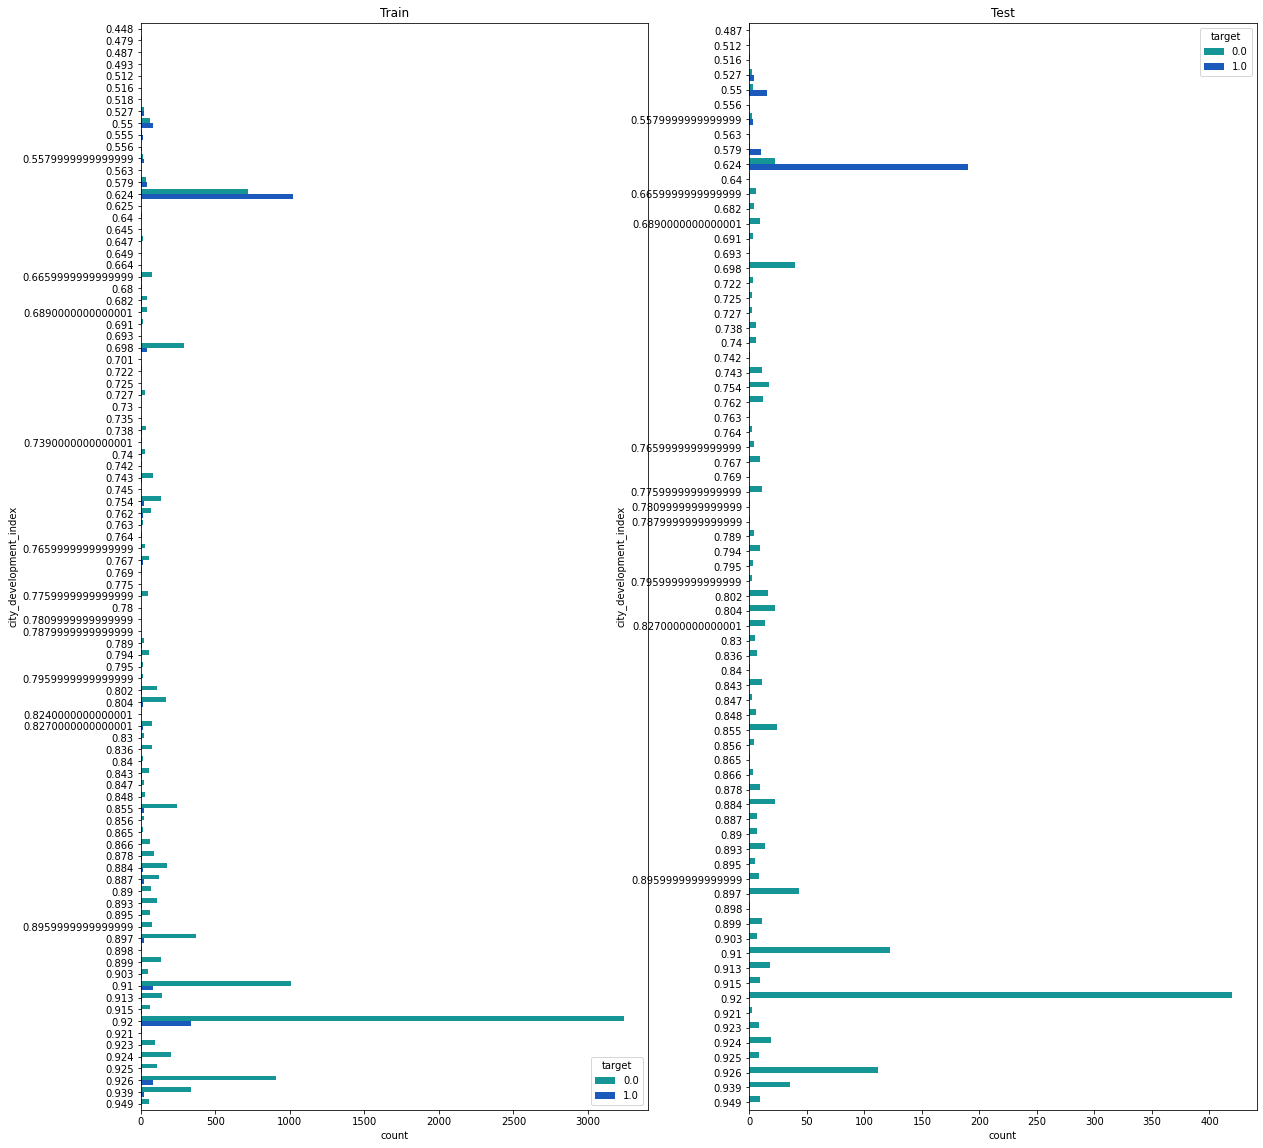

In [156]:
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.title("Train")
sns.countplot(y='city_development_index', hue = 'target' , data = train, palette='winter_r') 
plt.subplot(1, 2, 2)
plt.title("Test")
sns.countplot(y='city_development_index', hue = 'target' , data = test, palette='winter_r') 
plt.show()

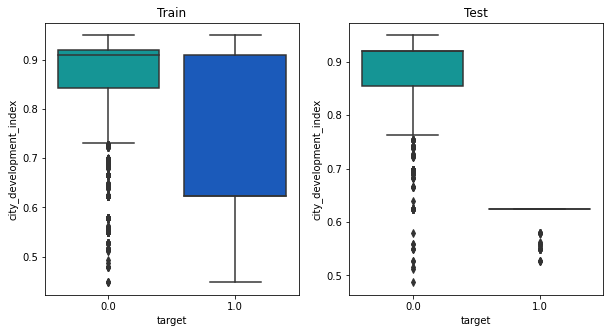

In [157]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='target', y = 'city_development_index', data=train, palette = "winter_r")
plt.title("Train")
plt.subplot(1, 2, 2)
sns.boxplot(x='target', y = 'city_development_index', data=test, palette = "winter_r")
plt.title("Test")
plt.show()

Comparando agora os gráficos da target relacionada com as cidades dos dois datasets:

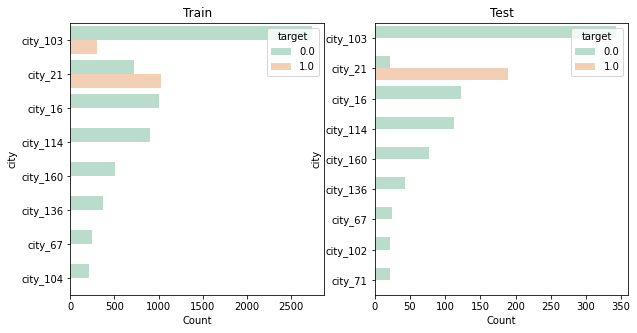

In [158]:
df_city_t= test.groupby(['city', 'target']).count().sort_values("enrollee_id", ascending = False)
df_city_t.reset_index(level=["city"], inplace = True)
df_city_t.reset_index(level=["target"], inplace=True)
df_city_t = df_city_t.rename(columns={'enrollee_id': 'Count'})
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(y='city', x='Count', data=df_city.iloc[0:10], hue = 'target', palette='Pastel2')
plt.title("Train")
plt.subplot(1,2,2)
sns.barplot(y='city', x='Count', data=df_city_t.iloc[0:10], hue = 'target', palette='Pastel2')
plt.title("Test")
plt.show()
plt.show()

Mais um gráfico do dataset de treino relacionado com o número de horas de treinamento:

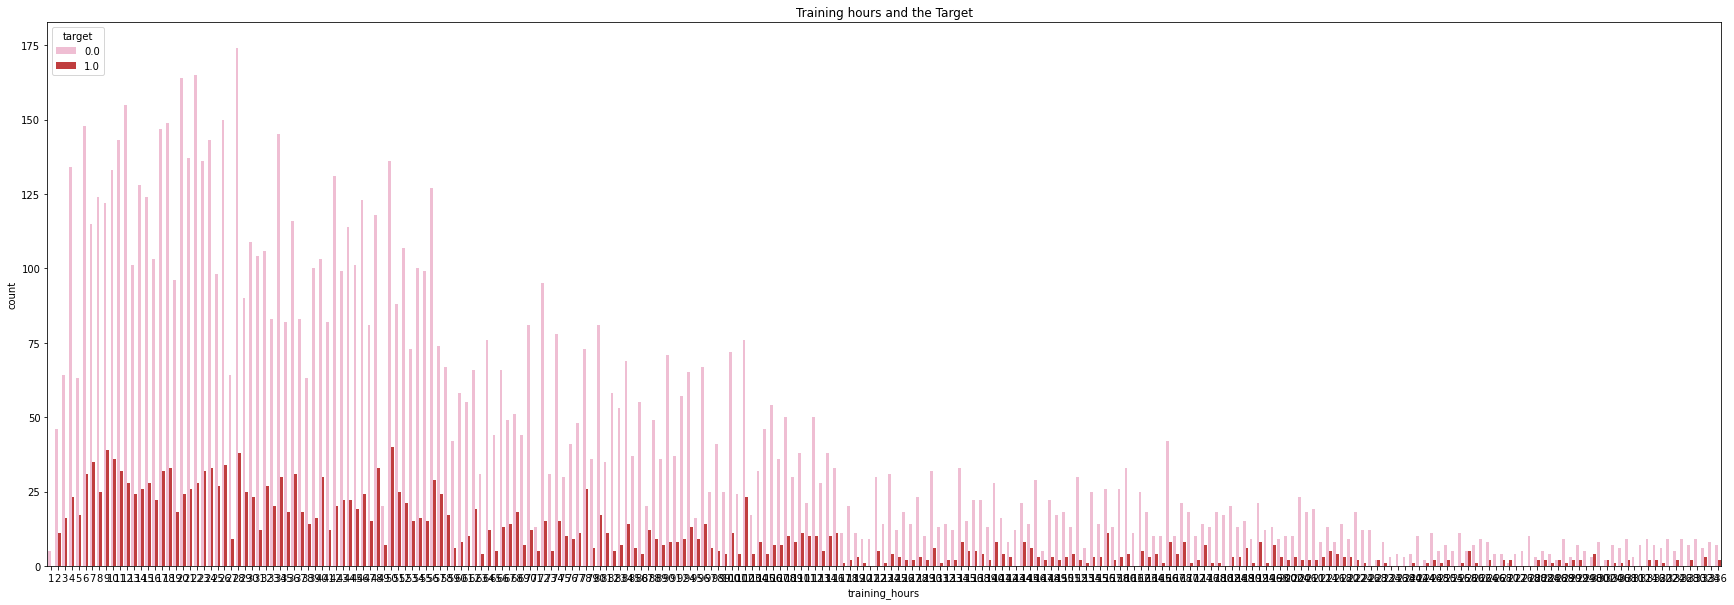

In [159]:
plt.figure(figsize=(30,10))
sns.countplot(x='training_hours', hue = 'target', data=train, palette = "tab20_r")
plt.title("Training hours and the Target")
plt.show()

E a respectiva comparação com o dataset de teste:

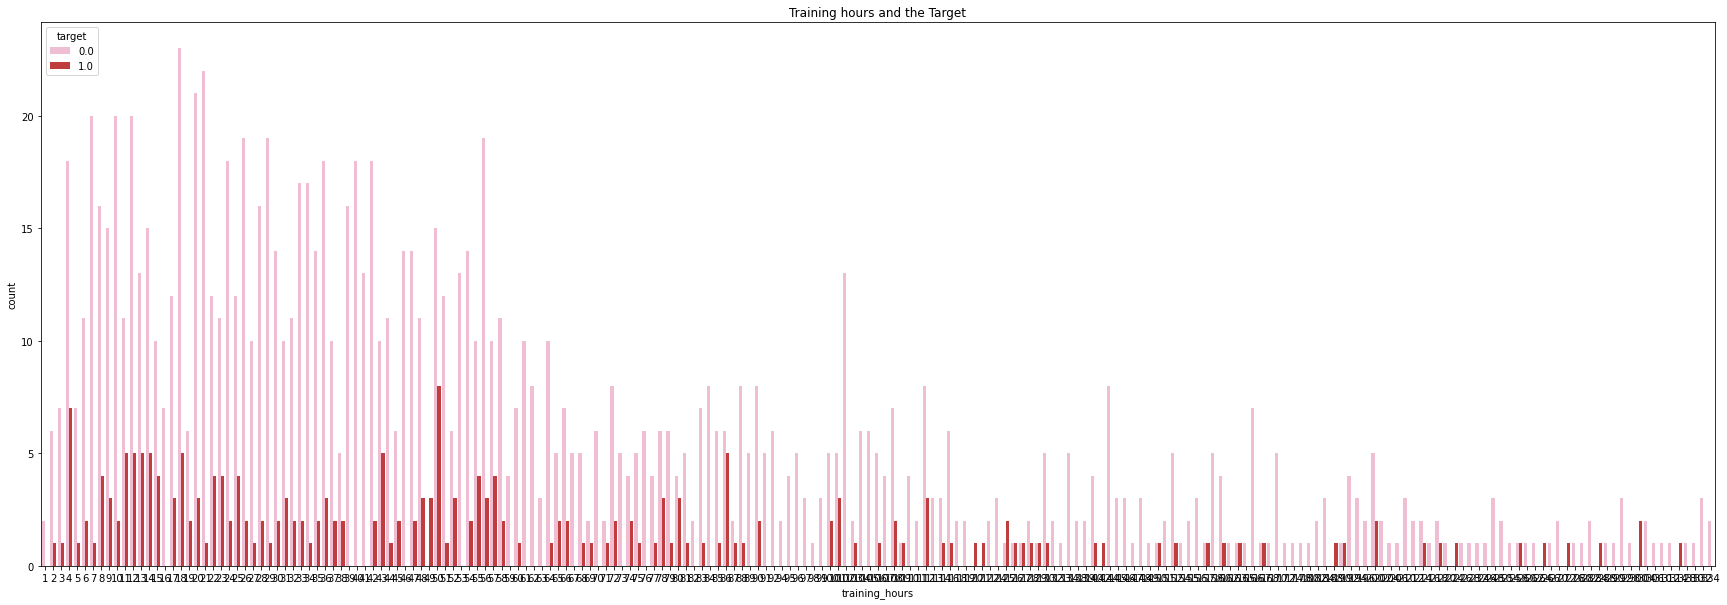

In [160]:
plt.figure(figsize=(30,10))
sns.countplot(x='training_hours', hue = 'target', data=test, palette = "tab20_r")
plt.title("Training hours and the Target")
plt.show()

Dessa forma, com algumas análises, pôde-se perceber que a predição feita segue de fato os dados do dataset de treino utilizado e parece correta! 